In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
import importlib
import dataImportFuctions
import functions

importlib.reload(dataImportFuctions)
from dataImportFuctions import main_data_dic_generator
from dataImportFuctions import TS_extractor
from dataImportFuctions import TS_extractor_v2
from dataImportFuctions import TS_dic_to_NLDR_format

importlib.reload(functions)
from functions import estimate_global_dimension_pca
from functions import dictionary_random_reducer
from functions import mannwhitneyu_stat

## imprting all data of controls and patients for both parcellations

In [1]:
#for controls
controls_base_dir = '/Users/user/Int Dim NF1 WM/controls Schaeffer300_AAL3_timeseries_00301_Run1'
controls_file_pattern = 'Schaeffer300_AAL3_timeseries_{:03d}_Run1.mat'  # {:03d} will be replaced by numbers with leading zeros
#controls_index_list= [3,4,6,7,8,10,11,12,13,14,15,17,18,19]
controls_index_list= [1,2,3,4,6,7,8,10,11,12,13,14,15,17,18,19] #the original
N_c= len(controls_index_list)

#for patients
patients_base_dir = '/Users/user/Int Dim NF1 WM/patients Schaeffer300_AAL3_timeseries_00301_Run1'
patients_file_pattern = 'Schaeffer300_AAL3_timeseries_{:03d}01_Run1.mat'
#patients_index_list= [3,4,5,6,7,8,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,29,30,32,33]
patients_index_list= [1,2,3,4,5,6,7,8,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,29,30,32,33] #the original
N_p= len(patients_index_list)

In [6]:
#controls
#AAL3
controls_AAL3_main_dic= main_data_dic_generator(controls_base_dir,
                                           controls_file_pattern, 
                                           controls_index_list,
                                           'AAL3',
                                           False) #print_bool
#Schaeffer300                     
controls_Schaeffer300_main_dic= main_data_dic_generator(controls_base_dir,
                                           controls_file_pattern, 
                                           controls_index_list,
                                           'Schaeffer300',
                                           False) #print_bool

#patients
#AAL3
patients_AAL3_main_dic= main_data_dic_generator(patients_base_dir,
                                           patients_file_pattern, 
                                           patients_index_list,
                                           'AAL3',
                                           False) #print_bool
#Schaeffer300                                           
patients_Schaeffer300_main_dic= main_data_dic_generator(patients_base_dir,
                                           patients_file_pattern, 
                                           patients_index_list,
                                           'Schaeffer300',
                                           False) #print_bool                                    

In [ ]:
# print(controls_AAL3_main_dic.keys())
# print(controls_AAL3_main_dic['001'].shape)

dict_keys(['001', '002', '003', '004', '006', '007', '008', '010', '011', '012', '013', '014', '015', '017', '018', '019'])
(144, 166)


In [22]:
#controls
#AAL3
controls_AAL3_dic_2back_TSs, controls_AAL3_dic_0back_TSs, controls_AAL3_dic_entire_TSs = TS_extractor_v2(controls_AAL3_main_dic, 
                False) #print_bool
#Schaeffer300  
controls_Schaeffer300_dic_2back_TSs, controls_Schaeffer300_dic_0back_TSs, controls_Schaeffer300_dic_entire_TSs = TS_extractor_v2(controls_Schaeffer300_main_dic,
                False) #print_bool

#patients
#AAL3
patients_AAL3_dic_2back_TSs, patients_AAL3_dic_0back_TSs, patients_AAL3_dic_entire_TSs = TS_extractor_v2(patients_AAL3_main_dic,
                False) #print_bool
#Schaeffer300  
patients_Schaeffer300_dic_2back_TSs, patients_Schaeffer300_dic_0back_TSs, patients_Schaeffer300_dic_entire_TSs = TS_extractor_v2(patients_Schaeffer300_main_dic,
                False) #print_bool

In [23]:
print(controls_AAL3_dic_2back_TSs['001'].shape)
print(controls_AAL3_dic_0back_TSs['001'].shape)
print(controls_AAL3_dic_entire_TSs['001'].shape)

(72, 166)
(72, 166)
(144, 166)


## Global intrinsic dimension of cohort space space

In [47]:
#Schaeffer300 0-back G-PCA patient vs controls 
percentage_list= np.linspace(0.8,0.99,20)
print(percentage_list)
bootstrap_seed_list= [12,85,45,96,98,65,44,9,85,21,174,762,228,111,764,224,601,381,55,100]
N_PCA= 8 #10

Schaeffer300_pca_GID_controls_0b_mean= []
Schaeffer300_pca_GID_controls_0b_std= []

Schaeffer300_pca_GID_patients_0b_mean= []
Schaeffer300_pca_GID_patients_0b_std= []

p_value_Schaeffer300_0b_controls_vs_patients= []

print_bool= False
for perc in percentage_list:
    if print_bool== True:
        print("PCA threshold= ", perc)
    #controls
    GDim_list_controls= []
    for seedd in bootstrap_seed_list:
        small_dic= dictionary_random_reducer(controls_Schaeffer300_dic_0back_TSs, seedd, N_PCA)
        selected_data_set= TS_dic_to_NLDR_format(small_dic,N_PCA)
        GDim= estimate_global_dimension_pca(selected_data_set,perc)
        #print(selected_data_set.shape)
        #print(GDim)
        GDim_list_controls.append(GDim)
    if print_bool== True:
        print(GDim_list_controls)
    GDim_list= np.array(GDim_list_controls)
    Schaeffer300_pca_GID_controls_0b_mean.append(np.mean(GDim_list_controls))
    Schaeffer300_pca_GID_controls_0b_std.append(np.std(GDim_list_controls))

    #patients
    GDim_list_patients= []
    for seedd in bootstrap_seed_list:
        small_dic= dictionary_random_reducer(patients_Schaeffer300_dic_0back_TSs, seedd, N_PCA)
        selected_data_set= TS_dic_to_NLDR_format(small_dic,N_PCA)
        GDim= estimate_global_dimension_pca(selected_data_set,perc)
        #print(selected_data_set.shape)
        #print(GDim)
        GDim_list_patients.append(GDim)
    
    if print_bool== True:
        print(GDim_list_patients)
    GDim_list_patients= np.array(GDim_list_patients)
    Schaeffer300_pca_GID_patients_0b_mean.append(np.mean(GDim_list_patients))
    Schaeffer300_pca_GID_patients_0b_std.append(np.std(GDim_list_patients))

        #t_stat, t_stat_p_value = scipy.stats.ttest_ind(GDim_1, GDim_2)
    MW_pvalue =mannwhitneyu_stat(GDim_list_controls, GDim_list_patients)
    p_value_Schaeffer300_0b_controls_vs_patients.append(MW_pvalue)
    # if MW_pvalue <= 0.05 :
    #     print("@@@@@@@@@@@@@")
        #print('threshold= ', perc, 'p-value= ', MW_pvalue)





[0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93
 0.94 0.95 0.96 0.97 0.98 0.99]


In [48]:
print(Schaeffer300_pca_GID_controls_0b_mean)
print(Schaeffer300_pca_GID_patients_0b_mean)
print(p_value_Schaeffer300_0b_controls_vs_patients)

[32.8, 34.6, 36.4, 38.35, 40.4, 42.8, 45.25, 47.95, 50.95, 54.25, 58.0, 62.0, 66.55, 71.8, 77.9, 85.0, 93.8, 104.8, 120.15, 144.65]
[36.25, 37.9, 39.9, 41.9, 44.2, 46.6, 49.2, 52.05, 55.15, 58.45, 62.1, 66.25, 70.95, 76.3, 82.45, 89.7, 98.4, 109.55, 124.85, 148.7]
[1.9366416512816603e-06, 3.362849856551539e-06, 7.98043696085974e-07, 1.1572386137770453e-06, 9.144595087772947e-07, 2.644497455743824e-06, 6.807967242803032e-07, 1.1902841120329746e-06, 8.990979301938995e-07, 1.0889149719706134e-06, 2.292407321344174e-06, 2.292407321344174e-06, 9.695878789188944e-07, 1.8284620241545757e-06, 1.9940014831892486e-06, 1.2616796848738495e-06, 3.241148310290287e-06, 2.501388179242536e-06, 1.4121071453329311e-06, 4.260904487705568e-06]


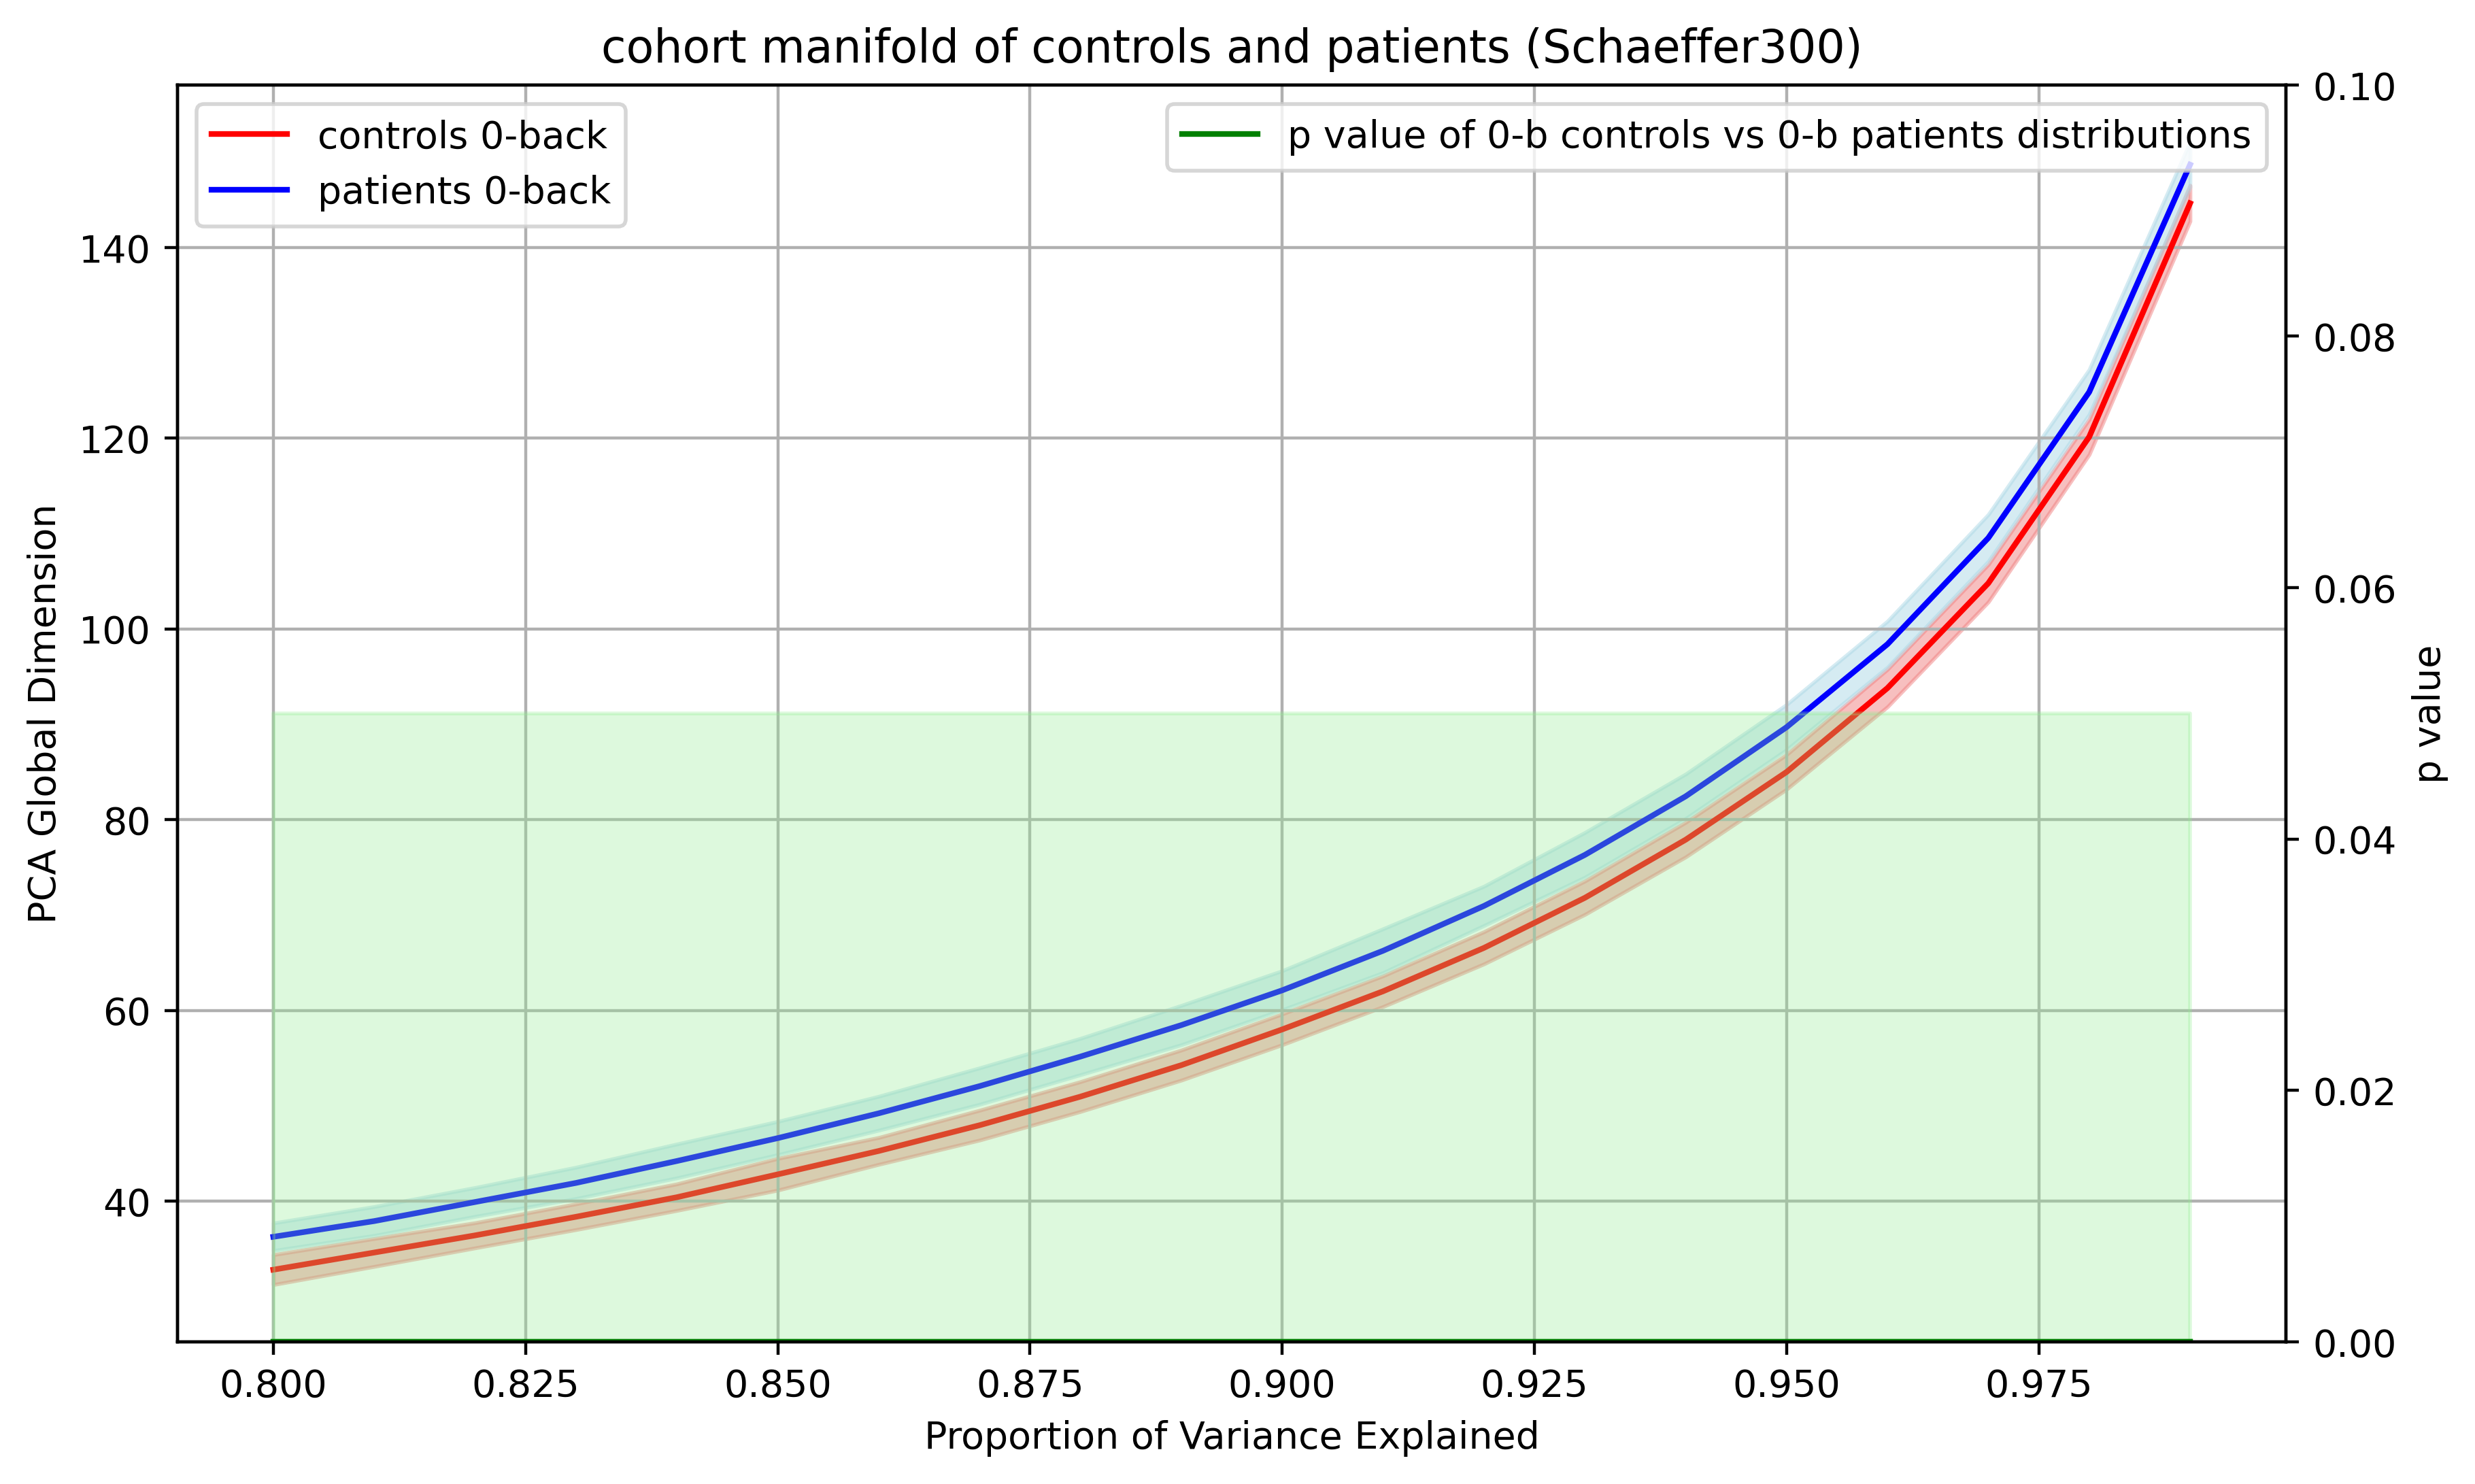

In [52]:
# Sample data for A and B (means and standard deviations)
A = np.array(Schaeffer300_pca_GID_controls_0b_mean)
B = np.array(Schaeffer300_pca_GID_patients_0b_mean)
A_std = np.array(Schaeffer300_pca_GID_controls_0b_std) 
B_std = np.array(Schaeffer300_pca_GID_patients_0b_std)

# Creating x-axis values
x_values = np.linspace(0.8,0.99,20)

# Creating the plot
fig, ax1 = plt.subplots(figsize=(10, 6), dpi=400)

# Plotting the curves for A and B
ax1.plot(x_values, A, 'r-', label="controls 0-back")
ax1.plot(x_values, B, 'b-', label="patients 0-back")


# Adding the shaded regions for standard deviations
ax1.fill_between(x_values, A - A_std, A + A_std, color='lightcoral', alpha=0.5)#, label="A (std dev)")
ax1.fill_between(x_values, B - B_std, B + B_std, color='lightblue', alpha=0.5)#, label="B (std dev)")

# Adding grid, labels, and title
ax1.grid(True)
ax1.set_xlabel("Proportion of Variance Explained")
ax1.set_ylabel("PCA Global Dimension")
ax1.set_title("cohort manifold of controls and patients (Schaeffer300)")
ax1.legend(loc='upper left')


C = np.array(p_value_Schaeffer300_0b_controls_vs_patients)
ax2 = ax1.twinx()
ax2.plot(x_values, C, 'g-', label="p value of 0-b controls vs 0-b patients distributions")
ax2.set_ylabel("p value")
#ax2.set_ylim(0, 0.1)
ax2.set_ylim(0, 0.1)
ax2.legend(loc='upper right')

thresholdd = 0.05
ax2.fill_between(x_values, ax2.get_ylim()[0], thresholdd, color='lightgreen', alpha=0.3)


plt.show()
